# Discrete Tradeoffs and Gaps: Stepped vs Smooth Curves

This notebook demonstrates how **discrete decisions create stepped tradeoff curves** with gaps, unlike continuous decisions which create smooth tradeoff curves.

Understanding discrete tradeoffs is critical because:
- **Discrete tradeoffs are stepped, not smooth**
- **There are gaps where certain tradeoff levels are impossible**
- **You cannot achieve tradeoff levels that require fractional items**
- **This fundamentally changes how you interpret and communicate recommendations**


## Key Concepts

**Tradeoff**: The relationship between competing objectives (e.g., cost vs. quality).

**Continuous Tradeoffs**:
- Smooth curves - can achieve any tradeoff level
- Small adjustments are always possible
- No gaps in the tradeoff space

**Discrete Tradeoffs**:
- Stepped curves with gaps - cannot achieve certain tradeoff levels
- Must make jumps between discrete options
- Gaps occur where fractional values would be needed
- Some tradeoff levels are impossible

**Critical insight**: Discrete decisions create fundamentally different tradeoffs than continuous decisions. You cannot fine-tune discrete tradeoffs the way you can with continuous tradeoffs.


## Scenario: Equipment Purchase Decision

You're deciding how many machines to purchase for a production facility. Each machine has:
- **Cost**: $50,000 per machine
- **Quality Score**: Each machine contributes 20 quality points

**The Tradeoff**:
- More machines = Higher cost AND Higher quality
- Fewer machines = Lower cost AND Lower quality

**The Key Question**: 
- Can you achieve ANY cost-quality combination? (Continuous)
- Or only specific combinations? (Discrete)


## Step 1: Install Packages


In [1]:
%pip install pulp pandas numpy matplotlib



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, value


## Step 3: Define Problem Data


In [3]:
# Problem parameters
cost_per_machine = 50000  # $50,000 per machine
quality_per_machine = 20  # 20 quality points per machine
max_machines = 10  # Maximum number of machines to consider

print("PROBLEM SETUP:")
print("=" * 60)
print(f"Cost per machine: ${cost_per_machine:,}")
print(f"Quality per machine: {quality_per_machine} points")
print(f"Maximum machines to consider: {max_machines}")
print("=" * 60)


PROBLEM SETUP:
Cost per machine: $50,000
Quality per machine: 20 points
Maximum machines to consider: 10


## Step 4: Continuous Tradeoff Curve (Smooth)

First, let's see what the tradeoff looks like if we treat machines as continuous (can buy fractional machines):


In [4]:
# Generate continuous tradeoff curve
# Can have any number of machines from 0 to 10 (including fractions)
continuous_machines = np.linspace(0, max_machines, 1000)
continuous_costs = continuous_machines * cost_per_machine
continuous_qualities = continuous_machines * quality_per_machine

# Create DataFrame
continuous_df = pd.DataFrame({
    'Machines': continuous_machines,
    'Cost': continuous_costs,
    'Quality': continuous_qualities
})

print("CONTINUOUS TRADEOFF (Smooth Curve):")
print("=" * 60)
print("You can achieve ANY cost-quality combination")
print("Example: 3.7 machines = $185,000 cost, 74 quality points")
print("Example: 4.2 machines = $210,000 cost, 84 quality points")
print("Example: 4.5 machines = $225,000 cost, 90 quality points")
print("=" * 60)
print("\nSample of continuous tradeoff points:")
display(continuous_df.iloc[::100].round(2))


CONTINUOUS TRADEOFF (Smooth Curve):
You can achieve ANY cost-quality combination
Example: 3.7 machines = $185,000 cost, 74 quality points
Example: 4.2 machines = $210,000 cost, 84 quality points
Example: 4.5 machines = $225,000 cost, 90 quality points

Sample of continuous tradeoff points:


,Machines,Cost,Quality
0,0.00,0.00,0.00
100,1.00,50050.05,20.02
200,2.00,100100.10,40.04
300,3.00,150150.15,60.06
400,4.00,200200.20,80.08
500,5.01,250250.25,100.10
600,6.01,300300.30,120.12
700,7.01,350350.35,140.14
800,8.01,400400.40,160.16
900,9.01,450450.45,180.18


## Step 5: Discrete Tradeoff Curve (Stepped with Gaps)

Now, let's see what the tradeoff looks like when machines must be whole numbers:


In [5]:
# Generate discrete tradeoff curve
# Can only have whole numbers of machines: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
discrete_machines = np.arange(0, max_machines + 1)
discrete_costs = discrete_machines * cost_per_machine
discrete_qualities = discrete_machines * quality_per_machine

# Create DataFrame
discrete_df = pd.DataFrame({
    'Machines': discrete_machines,
    'Cost': discrete_costs,
    'Quality': discrete_qualities
})

print("DISCRETE TRADEOFF (Stepped Curve with Gaps):")
print("=" * 60)
print("You can ONLY achieve specific cost-quality combinations")
print("Example: 3 machines = $150,000 cost, 60 quality points")
print("Example: 4 machines = $200,000 cost, 80 quality points")
print("GAP: Cannot achieve $175,000 cost with 70 quality points!")
print("GAP: Cannot achieve $185,000 cost with 74 quality points!")
print("GAP: Cannot achieve $225,000 cost with 90 quality points!")
print("=" * 60)
print("\nAll possible discrete tradeoff points:")
display(discrete_df)


DISCRETE TRADEOFF (Stepped Curve with Gaps):
You can ONLY achieve specific cost-quality combinations
Example: 3 machines = $150,000 cost, 60 quality points
Example: 4 machines = $200,000 cost, 80 quality points
GAP: Cannot achieve $175,000 cost with 70 quality points!
GAP: Cannot achieve $185,000 cost with 74 quality points!
GAP: Cannot achieve $225,000 cost with 90 quality points!

All possible discrete tradeoff points:


,Machines,Cost,Quality
0,0,0,0
1,1,50000,20
2,2,100000,40
3,3,150000,60
4,4,200000,80
5,5,250000,100
6,6,300000,120
7,7,350000,140
8,8,400000,160
9,9,450000,180


## Step 6: Visual Comparison - Smooth vs Stepped Tradeoff Curves

Let's visualize the difference between continuous and discrete tradeoffs:


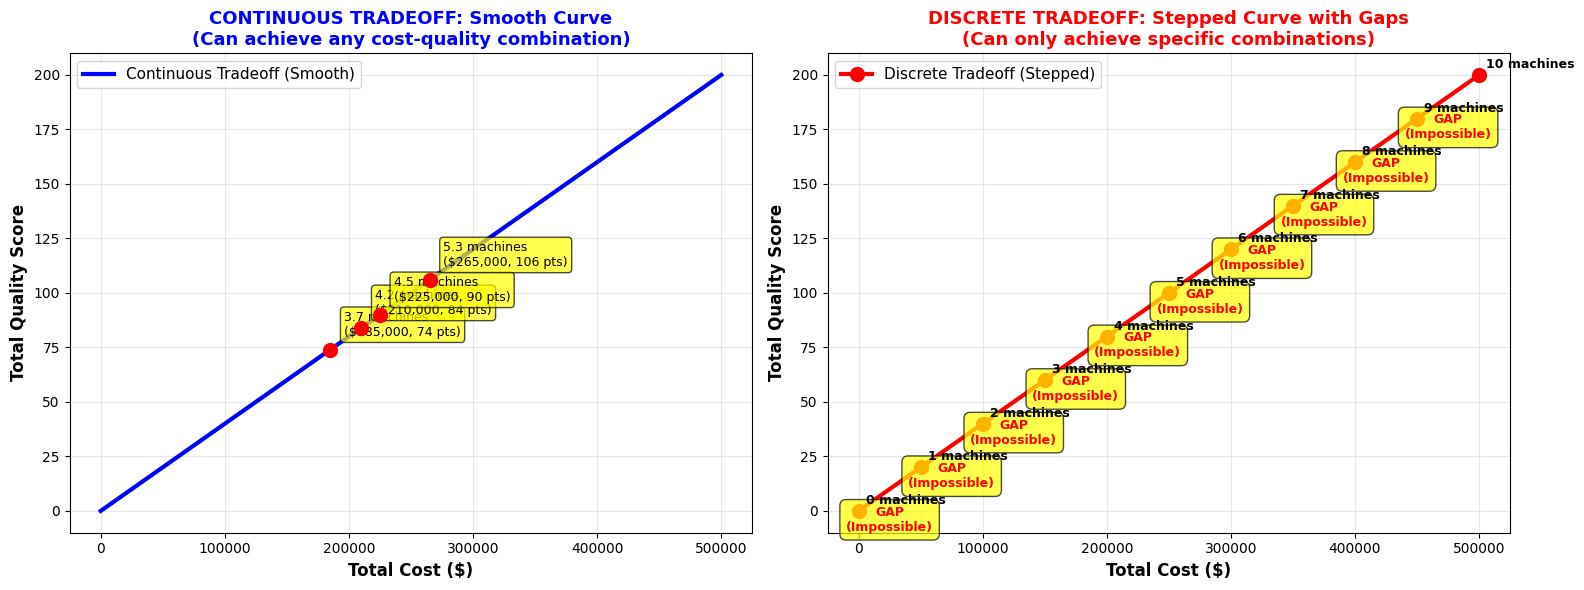


KEY INSIGHT:
Continuous: Smooth curve - can achieve ANY point on the line
Discrete: Stepped curve - can ONLY achieve the marked points
Gaps exist where tradeoff levels are impossible!


In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Continuous tradeoff (smooth curve)
ax1.plot(continuous_df['Cost'], continuous_df['Quality'], 
         'b-', linewidth=3, label='Continuous Tradeoff (Smooth)')
ax1.set_xlabel('Total Cost ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Quality Score', fontsize=12, fontweight='bold')
ax1.set_title('CONTINUOUS TRADEOFF: Smooth Curve\n(Can achieve any cost-quality combination)', 
              fontsize=13, fontweight='bold', color='blue')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

# Highlight some example points
example_points = [3.7, 4.2, 4.5, 5.3]
for machines in example_points:
    cost = machines * cost_per_machine
    quality = machines * quality_per_machine
    ax1.plot(cost, quality, 'ro', markersize=10, zorder=3)
    ax1.annotate(f'{machines} machines\n(${cost:,.0f}, {quality:.0f} pts)',
                (cost, quality), xytext=(10, 10), textcoords='offset points',
                fontsize=9, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Right plot: Discrete tradeoff (stepped curve)
ax2.plot(discrete_df['Cost'], discrete_df['Quality'], 
         'r-', linewidth=3, marker='o', markersize=10, label='Discrete Tradeoff (Stepped)')
ax2.set_xlabel('Total Cost ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Quality Score', fontsize=12, fontweight='bold')
ax2.set_title('DISCRETE TRADEOFF: Stepped Curve with Gaps\n(Can only achieve specific combinations)', 
              fontsize=13, fontweight='bold', color='red')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

# Highlight gaps
for i in range(len(discrete_df) - 1):
    x_gap = (discrete_df.iloc[i]['Cost'] + discrete_df.iloc[i+1]['Cost']) / 2
    y_gap = (discrete_df.iloc[i]['Quality'] + discrete_df.iloc[i+1]['Quality']) / 2
    ax2.annotate('GAP\n(Impossible)', (x_gap, y_gap), 
                xytext=(0, -30), textcoords='offset points',
                fontsize=9, ha='center', color='red', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Label each discrete point
for idx, row in discrete_df.iterrows():
    ax2.annotate(f'{int(row["Machines"])} machines',
                (row['Cost'], row['Quality']), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKEY INSIGHT:")
print("=" * 60)
print("Continuous: Smooth curve - can achieve ANY point on the line")
print("Discrete: Stepped curve - can ONLY achieve the marked points")
print("Gaps exist where tradeoff levels are impossible!")
print("=" * 60)


## Step 7: Side-by-Side Comparison

Let's overlay both curves to see the difference clearly:


/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_85871/1127357584.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(continuous_df['Cost'], continuous_df['Quality'],


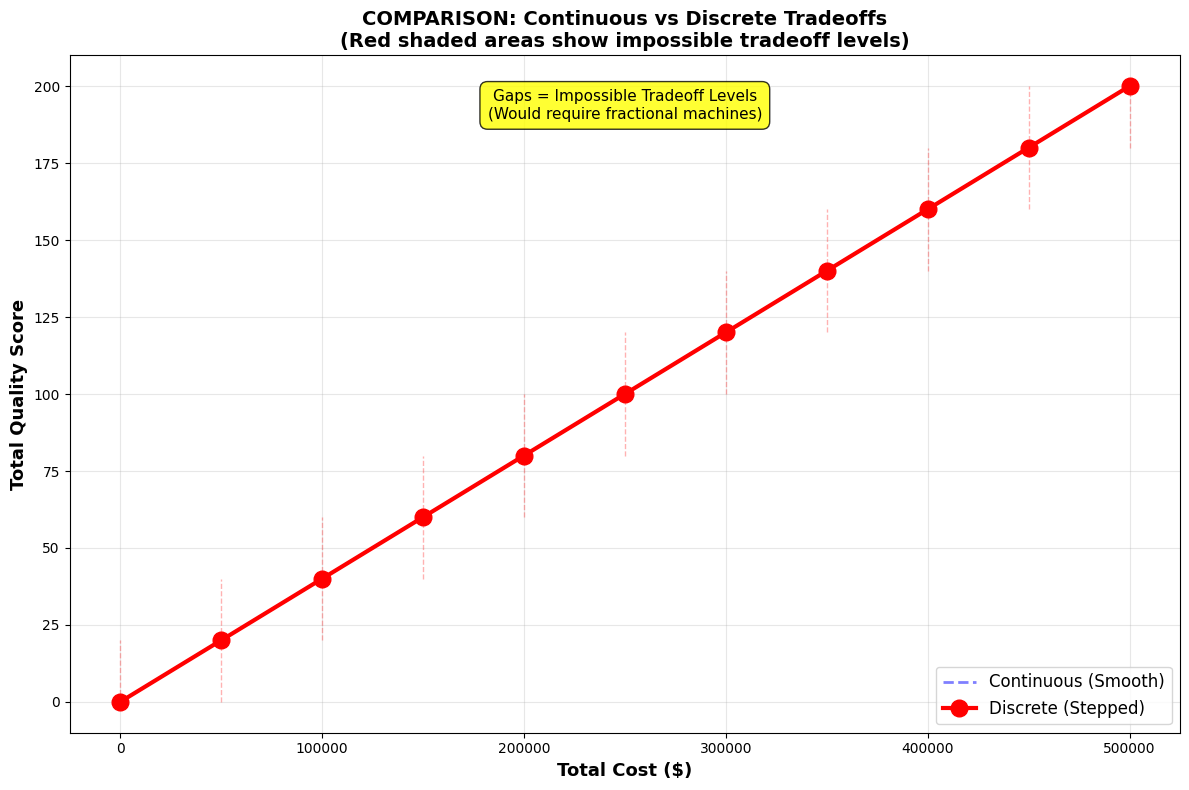


VISUAL COMPARISON:
Blue dashed line: Continuous tradeoff (smooth, any point possible)
Red solid line with markers: Discrete tradeoff (stepped, only marked points)
Red shaded areas: Gaps where tradeoff levels are IMPOSSIBLE


In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot continuous tradeoff (smooth)
ax.plot(continuous_df['Cost'], continuous_df['Quality'], 
        'b-', linewidth=2, alpha=0.5, label='Continuous (Smooth)', linestyle='--')

# Plot discrete tradeoff (stepped)
ax.plot(discrete_df['Cost'], discrete_df['Quality'], 
        'r-', linewidth=3, marker='o', markersize=12, label='Discrete (Stepped)', zorder=3)

# Shade the gaps to show impossible regions
for i in range(len(discrete_df) - 1):
    x1 = discrete_df.iloc[i]['Cost']
    x2 = discrete_df.iloc[i+1]['Cost']
    y1 = discrete_df.iloc[i]['Quality']
    y2 = discrete_df.iloc[i+1]['Quality']
    
    # Draw vertical lines to show gaps
    ax.plot([x1, x1], [y1, y2], 'r--', linewidth=1, alpha=0.3)
    ax.plot([x2, x2], [y1, y2], 'r--', linewidth=1, alpha=0.3)
    
    # Shade the gap region
    gap_x = np.linspace(x1, x2, 100)
    gap_y = np.linspace(y1, y2, 100)
    ax.fill_between(gap_x, gap_y, gap_y, alpha=0.1, color='red', hatch='///')

ax.set_xlabel('Total Cost ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Quality Score', fontsize=13, fontweight='bold')
ax.set_title('COMPARISON: Continuous vs Discrete Tradeoffs\n(Red shaded areas show impossible tradeoff levels)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12, loc='lower right')

# Add text annotation explaining gaps
ax.text(0.5, 0.95, 'Gaps = Impossible Tradeoff Levels\n(Would require fractional machines)', 
        transform=ax.transAxes, fontsize=11, 
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
        ha='center', va='top')

plt.tight_layout()
plt.show()

print("\nVISUAL COMPARISON:")
print("=" * 60)
print("Blue dashed line: Continuous tradeoff (smooth, any point possible)")
print("Red solid line with markers: Discrete tradeoff (stepped, only marked points)")
print("Red shaded areas: Gaps where tradeoff levels are IMPOSSIBLE")
print("=" * 60)


## Step 8: Demonstrate Impossible Tradeoff Levels

Let's show specific examples of tradeoff levels that are possible with continuous but impossible with discrete:


In [8]:
# Examples of impossible tradeoff levels
impossible_examples = [
    {'cost': 175000, 'quality': 70, 'reason': 'Would require 3.5 machines'},
    {'cost': 185000, 'quality': 74, 'reason': 'Would require 3.7 machines'},
    {'cost': 225000, 'quality': 90, 'reason': 'Would require 4.5 machines'},
    {'cost': 275000, 'quality': 110, 'reason': 'Would require 5.5 machines'},
]

print("IMPOSSIBLE TRADEOFF LEVELS (Discrete):")
print("=" * 70)
print(f"{'Cost':<15} {'Quality':<15} {'Reason':<40}")
print("-" * 70)

for example in impossible_examples:
    print(f"${example['cost']:>12,}  {example['quality']:>12}  {example['reason']:<40}")

print("=" * 70)
print("\nThese tradeoff levels are:")
print("  ✓ POSSIBLE with continuous variables (can buy 3.5, 3.7, 4.5, 5.5 machines)")
print("  ✗ IMPOSSIBLE with discrete variables (must buy whole machines)")
print("\nThis creates GAPS in the discrete tradeoff curve!")


IMPOSSIBLE TRADEOFF LEVELS (Discrete):
Cost            Quality         Reason                                  
----------------------------------------------------------------------
$     175,000            70  Would require 3.5 machines              
$     185,000            74  Would require 3.7 machines              
$     225,000            90  Would require 4.5 machines              
$     275,000           110  Would require 5.5 machines              

These tradeoff levels are:
  ✓ POSSIBLE with continuous variables (can buy 3.5, 3.7, 4.5, 5.5 machines)
  ✗ IMPOSSIBLE with discrete variables (must buy whole machines)

This creates GAPS in the discrete tradeoff curve!


## Step 9: Visualize Impossible Tradeoff Levels

Let's plot the impossible tradeoff levels on the graph:


/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_85871/2404413099.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(continuous_df['Cost'], continuous_df['Quality'],
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_85871/2404413099.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  ax.plot(discrete_df['Cost'], discrete_df['Quality'],


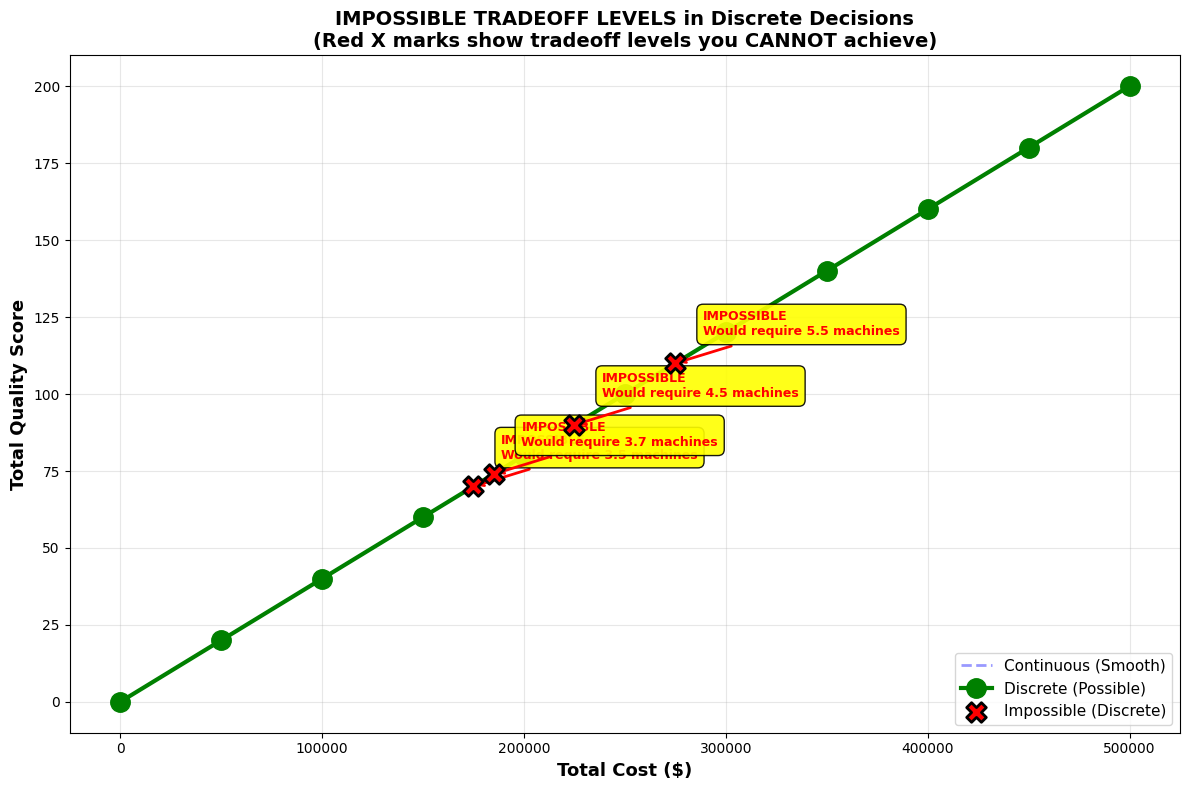


KEY TAKEAWAY:
In discrete decisions, you cannot achieve tradeoff levels
that fall in the gaps between discrete options.
This is fundamentally different from continuous decisions!


In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot continuous tradeoff (smooth)
ax.plot(continuous_df['Cost'], continuous_df['Quality'], 
        'b-', linewidth=2, alpha=0.4, label='Continuous (Smooth)', linestyle='--')

# Plot discrete tradeoff (stepped)
ax.plot(discrete_df['Cost'], discrete_df['Quality'], 
        'g-', linewidth=3, marker='o', markersize=14, 
        label='Discrete (Possible)', zorder=3, color='green')

# Mark impossible tradeoff levels
impossible_costs = [ex['cost'] for ex in impossible_examples]
impossible_qualities = [ex['quality'] for ex in impossible_examples]

ax.scatter(impossible_costs, impossible_qualities, 
           color='red', s=200, marker='X', zorder=4, 
           label='Impossible (Discrete)', edgecolors='black', linewidths=2)

# Add annotations for impossible points
for i, example in enumerate(impossible_examples):
    ax.annotate(f"IMPOSSIBLE\n{example['reason']}",
               (example['cost'], example['quality']),
               xytext=(20, 20), textcoords='offset points',
               fontsize=9, fontweight='bold', color='red',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.9),
               arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax.set_xlabel('Total Cost ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Quality Score', fontsize=13, fontweight='bold')
ax.set_title('IMPOSSIBLE TRADEOFF LEVELS in Discrete Decisions\n(Red X marks show tradeoff levels you CANNOT achieve)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='lower right')

plt.tight_layout()
plt.show()

print("\nKEY TAKEAWAY:")
print("=" * 60)
print("In discrete decisions, you cannot achieve tradeoff levels")
print("that fall in the gaps between discrete options.")
print("This is fundamentally different from continuous decisions!")
print("=" * 60)


## Step 10: Real-World Example - Facility Location

Let's see how this applies to a more realistic scenario: deciding how many facilities to open.


/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_85871/2622631192.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(continuous_facility_costs, continuous_facility_capacities,
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_85871/2622631192.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  ax.plot(discrete_facility_costs, discrete_facility_capacities,


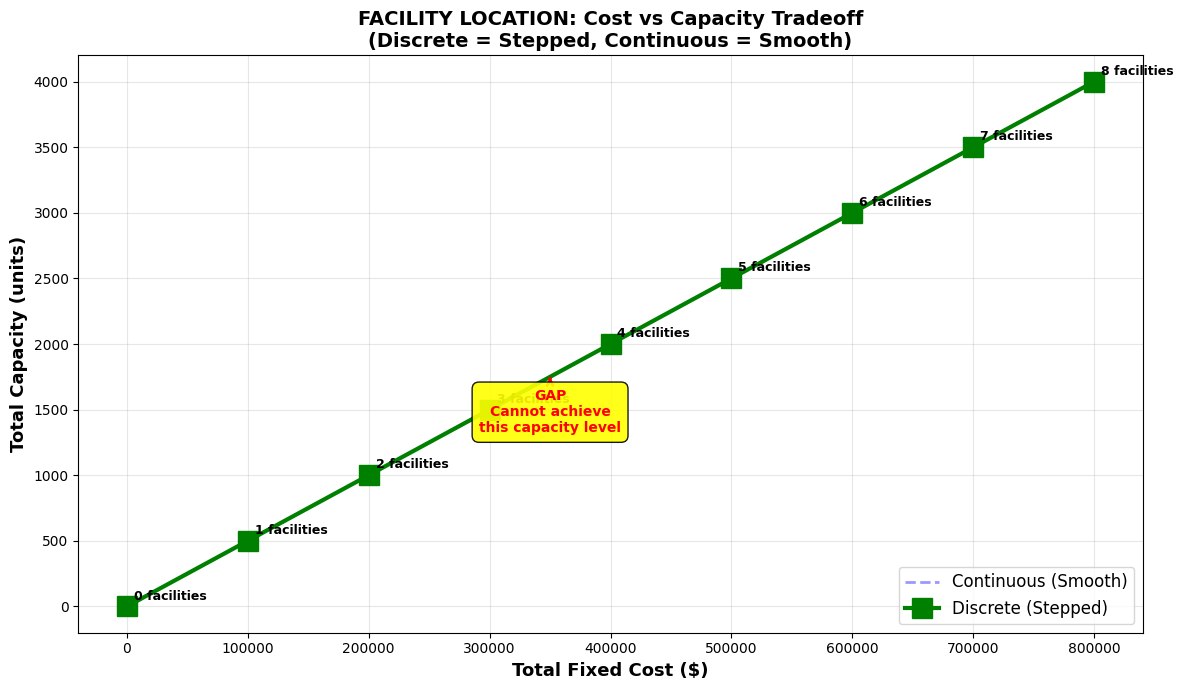


FACILITY LOCATION EXAMPLE:
Continuous: Can open 3.7 facilities = $370,000 cost, 1,850 capacity
Discrete: Can only open 3 or 4 facilities
  - 3 facilities = $300,000 cost, 1,500 capacity
  - 4 facilities = $400,000 cost, 2,000 capacity
GAP: Cannot achieve $370,000 cost with 1,850 capacity!


In [10]:
# Facility location scenario
fixed_cost_per_facility = 100000  # $100,000 fixed cost per facility
capacity_per_facility = 500  # 500 units capacity per facility
max_facilities = 8

# Continuous tradeoff
continuous_facilities = np.linspace(0, max_facilities, 1000)
continuous_facility_costs = continuous_facilities * fixed_cost_per_facility
continuous_facility_capacities = continuous_facilities * capacity_per_facility

# Discrete tradeoff
discrete_facilities = np.arange(0, max_facilities + 1)
discrete_facility_costs = discrete_facilities * fixed_cost_per_facility
discrete_facility_capacities = discrete_facilities * capacity_per_facility

fig, ax = plt.subplots(figsize=(12, 7))

# Plot continuous
ax.plot(continuous_facility_costs, continuous_facility_capacities,
        'b-', linewidth=2, alpha=0.4, label='Continuous (Smooth)', linestyle='--')

# Plot discrete
ax.plot(discrete_facility_costs, discrete_facility_capacities,
        'g-', linewidth=3, marker='s', markersize=14, 
        label='Discrete (Stepped)', zorder=3, color='green')

# Label discrete points
for i, (cost, cap) in enumerate(zip(discrete_facility_costs, discrete_facility_capacities)):
    ax.annotate(f'{i} facilities', (cost, cap),
               xytext=(5, 5), textcoords='offset points',
               fontsize=9, fontweight='bold')

# Highlight a specific gap
gap_cost = (discrete_facility_costs[3] + discrete_facility_costs[4]) / 2
gap_cap = (discrete_facility_capacities[3] + discrete_facility_capacities[4]) / 2
ax.annotate('GAP\nCannot achieve\nthis capacity level',
           (gap_cost, gap_cap), xytext=(0, -40), textcoords='offset points',
           fontsize=10, ha='center', color='red', fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.9),
           arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax.set_xlabel('Total Fixed Cost ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Capacity (units)', fontsize=13, fontweight='bold')
ax.set_title('FACILITY LOCATION: Cost vs Capacity Tradeoff\n(Discrete = Stepped, Continuous = Smooth)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()

print("\nFACILITY LOCATION EXAMPLE:")
print("=" * 60)
print("Continuous: Can open 3.7 facilities = $370,000 cost, 1,850 capacity")
print("Discrete: Can only open 3 or 4 facilities")
print("  - 3 facilities = $300,000 cost, 1,500 capacity")
print("  - 4 facilities = $400,000 cost, 2,000 capacity")
print("GAP: Cannot achieve $370,000 cost with 1,850 capacity!")
print("=" * 60)


## Summary

**Key Takeaways:**

1. **Continuous tradeoffs are smooth**: You can achieve any tradeoff level along a smooth curve.

2. **Discrete tradeoffs are stepped**: You can only achieve specific tradeoff levels at discrete points.

3. **Gaps exist in discrete tradeoffs**: There are tradeoff levels that are impossible to achieve because they would require fractional items.

4. **This affects decision-making**: 
   - You cannot fine-tune discrete tradeoffs the way you can with continuous tradeoffs
   - Some tradeoff levels are simply impossible
   - You must choose from the available discrete options

5. **Communication matters**: When explaining discrete recommendations, you must explain why certain tradeoff levels are impossible due to the gaps.

**Why This Matters:**
- Understanding discrete tradeoffs helps you set realistic expectations
- It prevents you from trying to achieve impossible tradeoff levels
- It helps you communicate recommendations more effectively
- It improves decision quality by recognizing the fundamental differences between continuous and discrete decisions
